Сироткин Сергей ИУ5-65Б РК1
Вариант 14

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Загрузка данных
df = pd.read_csv('Admission_Predict_Ver1.1.csv')


In [4]:
# Вывод первых строк
print("Первые строки набора данных:")
print(df.head())

Первые строки набора данных:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [5]:
# Переименование столбца (убираем лишний пробел в 'LOR ')
df.rename(columns={'LOR ': 'LOR'}, inplace=True)

# Проверка на пропуски
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Количество пропущенных значений:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Добавим искусственно пропуски для демонстрации обработки

In [9]:
# Добавим 7% пропусков
np.random.seed(100)
miss_rate = 0.07

# Выбор индексов для пропусков
miss_idx_gre = df.sample(frac=miss_rate).index
miss_idx_un_r = df.sample(frac=miss_rate).index

df.loc[miss_idx_gre, 'GRE Score'] = np.nan  # количественный признак
df.loc[miss_idx_un_r, 'University Rating'] = np.nan  # категориальный признак

# После добавления пропусков
print("\nПосле добавления пропусков:")
print(df.isnull().sum())



После добавления пропусков:
Serial No.            0
GRE Score            36
TOEFL Score           0
University Rating    36
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64


1. Обработка количественного признака (GRE Score)

In [13]:
# Заполним средним значением
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

2. Обработка категориального признака (University Rating)

In [14]:
# Заполним модой
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

# Повторная проверка пропусков
print("\nПосле обработки пропусков:")
print(df.isnull().sum())


После обработки пропусков:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64



После обработки пропусков:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


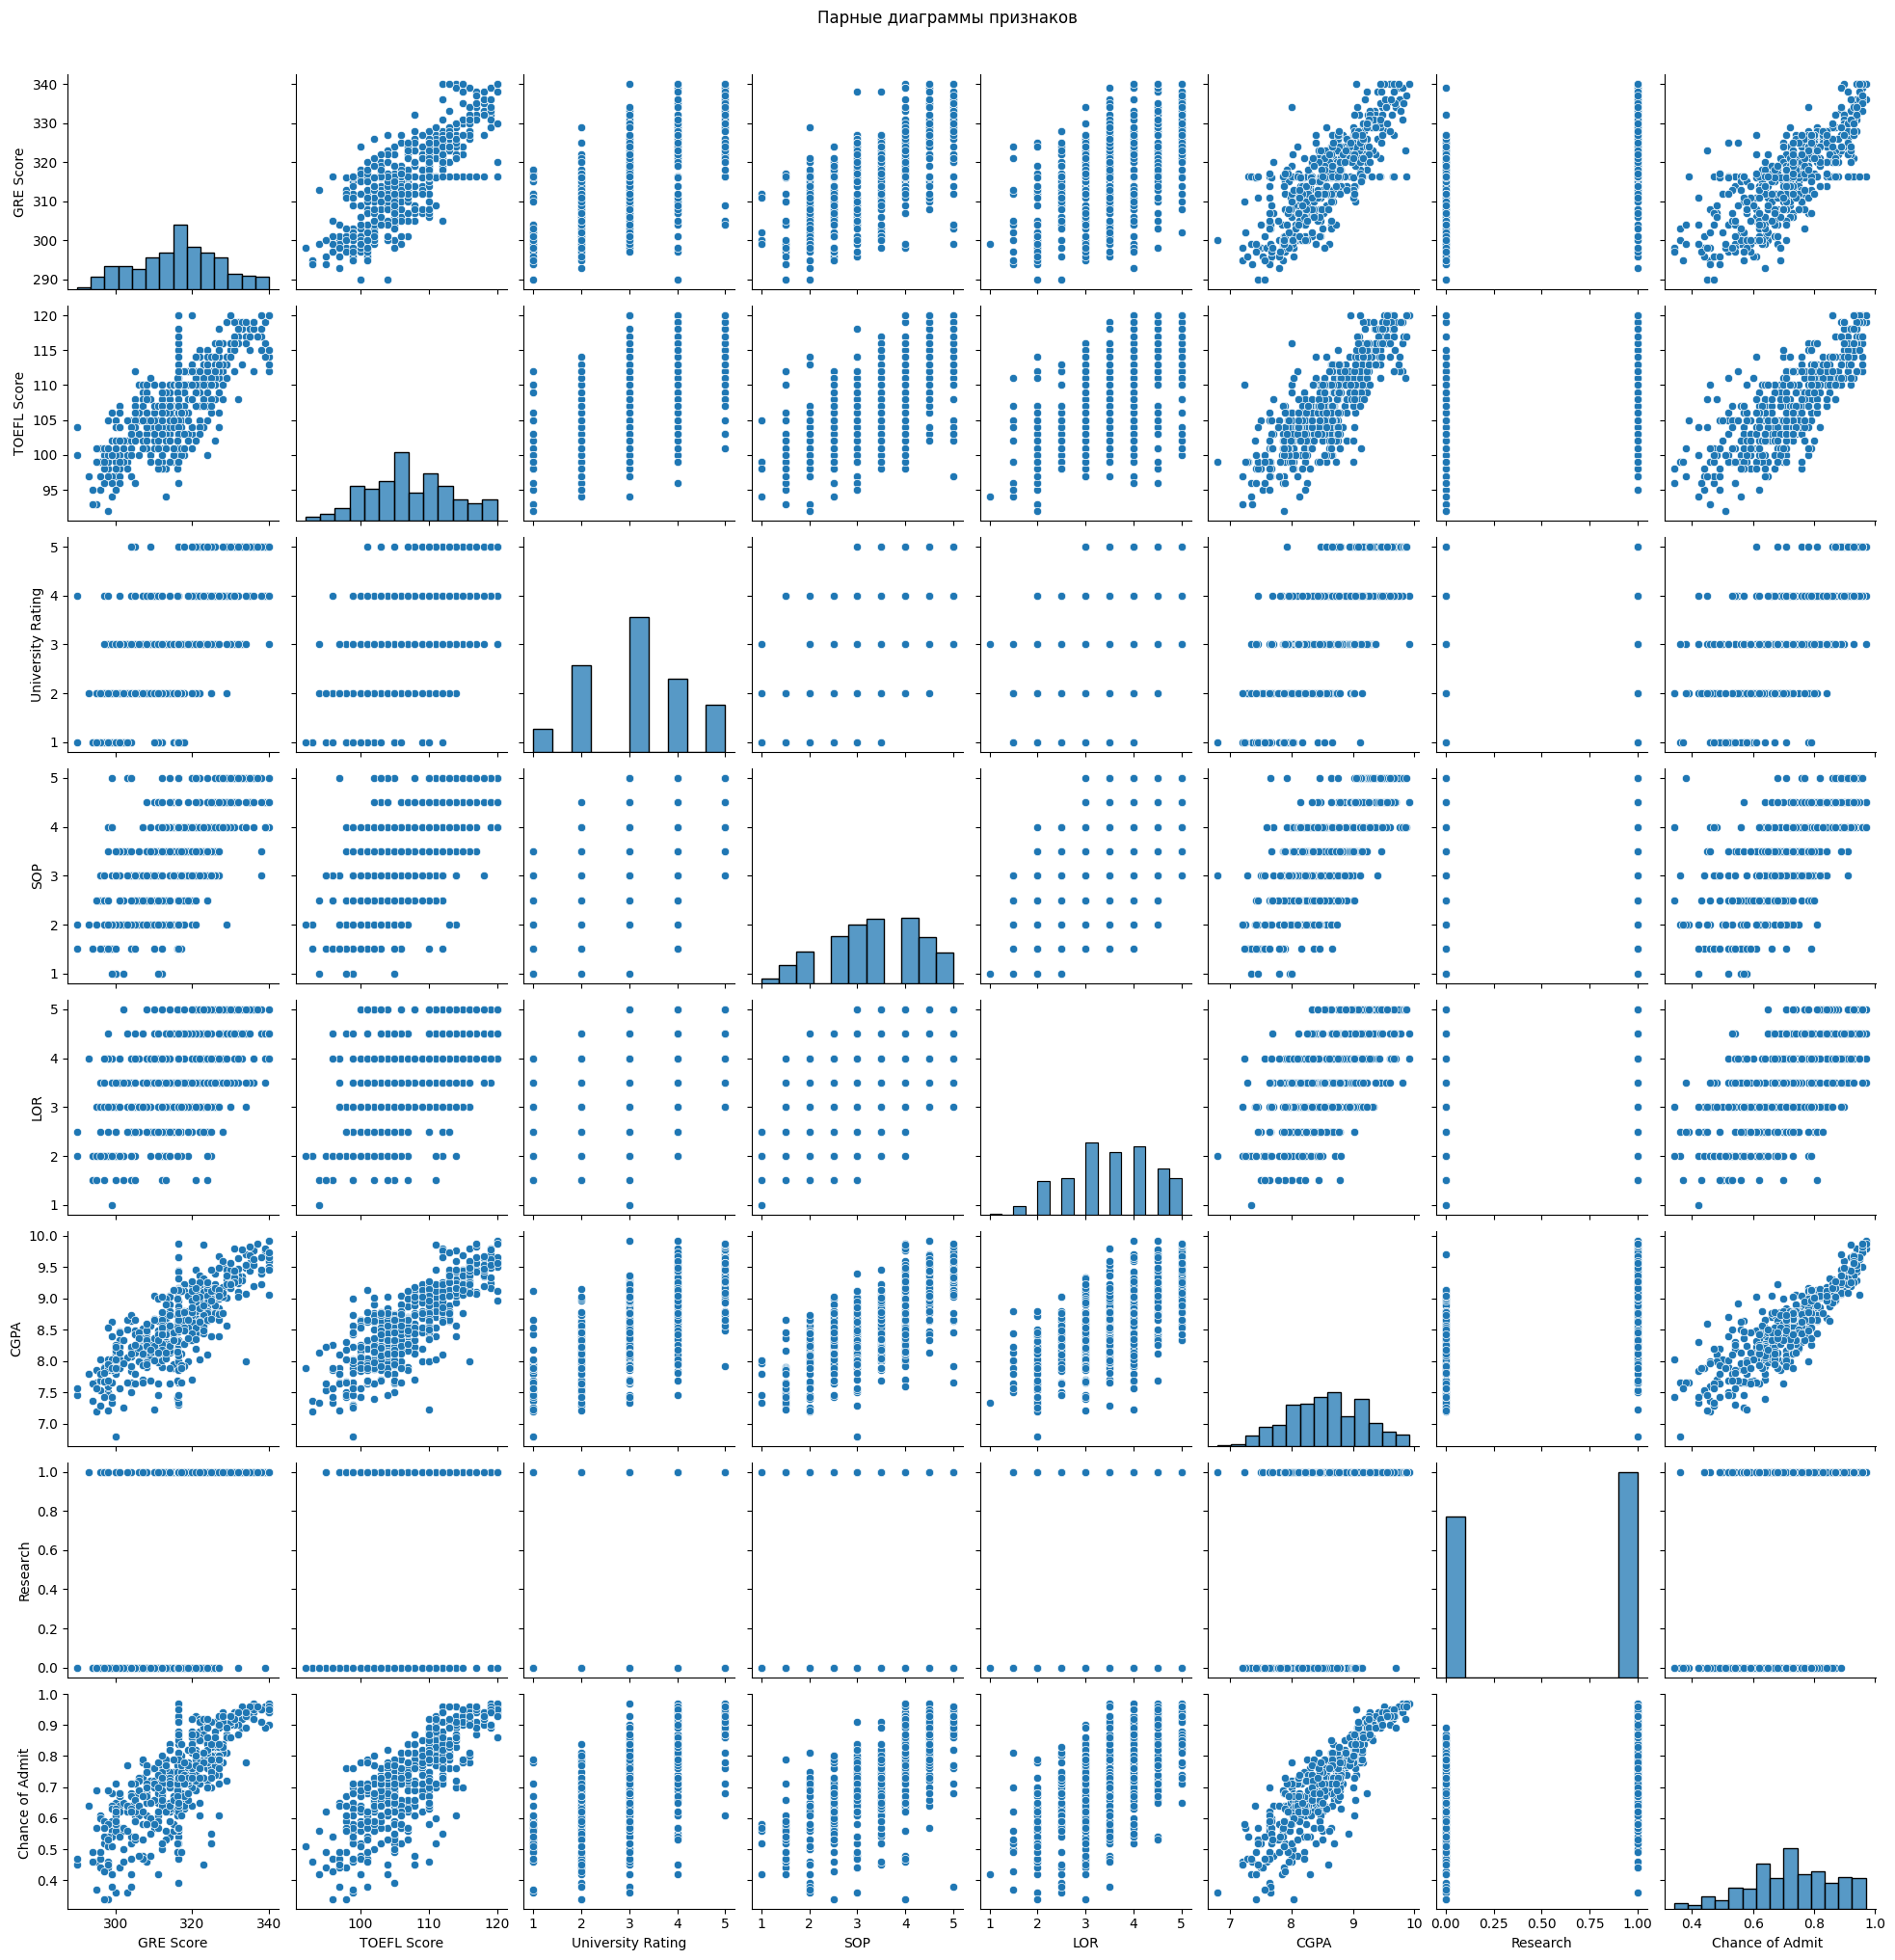


Выбранные признаки для построения модели:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


In [15]:
# Повторная проверка пропусков
print("\nПосле обработки пропусков:")
print(df.isnull().sum())

# Построение парных диаграмм
sns.pairplot(df.drop(columns=["Serial No."]))
plt.suptitle("Парные диаграммы признаков", y=1.02)
plt.show()

Выбранные признаки для построения модели:
GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

Обоснование:

-  Все признаки, кроме 'Serial No.' имеют потенциальное влияние на вероятность поступления.
- 'CGPA', 'GRE Score', 'TOEFL Score' — напрямую отражают академические показатели.
- 'University Rating', 'SOP', 'LOR', 'Research' — косвенно влияют через качество резюме и институциональную репутацию.
- 'Serial No.' — это просто идентификатор, в модели не нужен.